<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/Lab1_fmmraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Для формирования исходных данных сгенерировать случайным образом в пространстве критериев     точек, равномерно распределенных на множестве достижимых векторных оценок, заданном системой ограничений-неравенств 

n=23

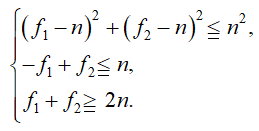

In [77]:
from numpy.lib.nanfunctions import nancumsum
from random import uniform
import numpy as np

n=23
NACH=11.5
KON=46
KOLVO=20

def get_odz(f1):
    f2=[]
    yverh, yniz = 0, 0
    f1sq = 11.5*np.sqrt(2) + 23
    if (f1 >= 11.5) and (f1 <= 23):
        yverh=23+f1
        yniz=46-f1
    elif (f1 > 23) and (f1 <= f1sq):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz=46-f1
    elif (f1 > f1sq) and (f1 <= 46):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz= - np.sqrt((23**2 - (f1-23)**2)) + 23
    f2.append(yniz)
    f2.append(yverh)
    return(f2)

def gener_f1_f2(nach, kon, kolvo):
    f1_ar = np.random.uniform(nach, kon, kolvo)  #сгенерировали массив иксов
    f2_ar = []
    for f1 in f1_ar:
        na, ko = get_odz(f1)
        f2 = uniform(na, ko)
        f2_ar.append(f2) 
    #dictionary = dict(zip(f1_ar, f2_ar))
    return(f1_ar, f2_ar)

#F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
#print(F1)
#print(F2)

In [78]:
def draw_vse(F1, F2):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=((15,9)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    ax.scatter(F1, F2, color = 'purple', marker = '*')  #точки

    cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'blue')
    ax.plot(f1b, f2b, color = 'green')

    plt.show()

2.	Определить множество эффективных проектов с помощью алгоритма исключения заведомо неэффективных решений.

In [79]:
def pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 1
    elif (t1 <= f1) and (t2 <= f2):
        return -1
    else:
        return 0

def find_pareto(f1_ar, f2_ar, kolvo):
    tabl = []
    for f1, f2 in zip(f1_ar, f2_ar):
        inc = 0
        el = [0 for i in range(kolvo)]
        tabl.append(el)
        for t1, t2 in zip(f1_ar, f2_ar):
            if (len(tabl)==1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] != -1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] == -1):
                tabl[len(tabl)-1][inc] = -1
            inc = inc + 1
    Tabl = np.array(tabl)
    inc = 0
    pare1 = []
    pare2 = []
    not_pare1 = []
    not_pare2 = []
    for q in Tabl[-1]:
        if (q==-1):
            not_pare1.append(f1_ar[inc])
            not_pare2.append(f2_ar[inc])
        else:
            pare1.append(f1_ar[inc])
            pare2.append(f2_ar[inc])
        inc = inc + 1
    return(pare1, pare2, not_pare1, not_pare2)
        

#PARE1, PARE2, NOT_PARE1, NOT_PARE2 = find_pareto(F1, F2, KOLVO)

In [80]:
def draw_pareto(PARE1, PARE2, NOT_PARE1, NOT_PARE2):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=((15,9)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    ax.scatter(NOT_PARE1, NOT_PARE2, color = '#FC0FC0', marker = '*')  #точки

    cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'blue')
    ax.plot(f1b, f2b, color = 'green')

    plt.show()

3.	Выполнить кластеризацию множества проектов с помощью алгоритма многокритериального ранжирования данных на основе вычисления индекса эффективности. В качестве центров кластеров использовать значения индекса эффективности: K1=1  K2=0.85 K3=0.75

In [81]:
def cluster_pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 0
    elif (t1 >= f1) and (t2 >= f2):
        return 1
    else:
        return 0

def cluster_find_pareto(f1_ar, f2_ar, kolvo): 
    import pandas as pd
    kl1 = [[], []]
    kl8 = [[], []]
    kl7 = [[], []]
    kl6 = [[], []]
    inc = 0
    bi = [0 for i in range(kolvo)]  
    F = [0 for i in range(kolvo)]
    kakie = [[] for i in range(kolvo)]  
    K = [0 for i in range(kolvo)]
    for f1, f2 in zip(f1_ar, f2_ar):
        inc2=0
        for t1, t2 in zip(f1_ar, f2_ar):
            cpm = cluster_pareto_mu(f1,f2,t1,t2)
            bi[inc]=bi[inc]+ cpm 
            if cpm==1:
                kakie[inc].append(inc2)
            inc2 = inc2 + 1
        F[inc] = 1 / (1+(bi[inc]/(kolvo-1)))
        if F[inc] == 1:   
            K[inc] = 1
            kl1[0].append(f1_ar[inc]) 
            kl1[1].append(f2_ar[inc])
        elif (F[inc]<1) and (F[inc]>=0.85):
            K[inc] = 0.85
            kl8[0].append(f1_ar[inc]) 
            kl8[1].append(f2_ar[inc])
        elif (F[inc]<0.85) and (F[inc]>=0.7):
            K[inc] = 0.75 
            kl7[0].append(f1_ar[inc]) 
            kl7[1].append(f2_ar[inc])
        else:
            K[inc] = 0.6  
            kl6[0].append(f1_ar[inc]) 
            kl6[1].append(f2_ar[inc])
        inc = inc + 1
    tabl = {'f1': f1_ar, 
            'f2': f2_ar, 
            'bi': bi, 
            'bi точки': kakie, 
            'Фi':F, 
            'Ki': K}
    Tabl = pd.DataFrame(tabl)
    display(Tabl)
    return kl1, kl8, kl7, kl6, Tabl

In [82]:
def draw_cluster(F1, F2, KOLVO):
    import pandas as pd
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=((15,9)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    KL1, KL8, KL7, KL6, TABL = cluster_find_pareto(F1, F2, KOLVO)

    ax.scatter(KL1[0], KL1[1], color = 'green', marker = '*')  #точки
    ax.scatter(KL8[0], KL8[1], color = 'orange', marker = '*')  #точки
    ax.scatter(KL7[0], KL7[1], color = 'blue', marker = '*')  #точки
    ax.scatter(KL6[0], KL6[1], color = 'red', marker = '*')  #точки

    cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'blue')
    ax.plot(f1b, f2b, color = 'green')

    plt.show()

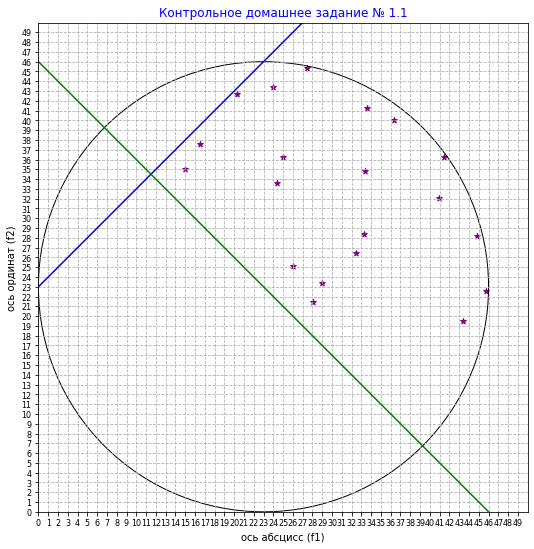

<Figure size 360x144 with 0 Axes>

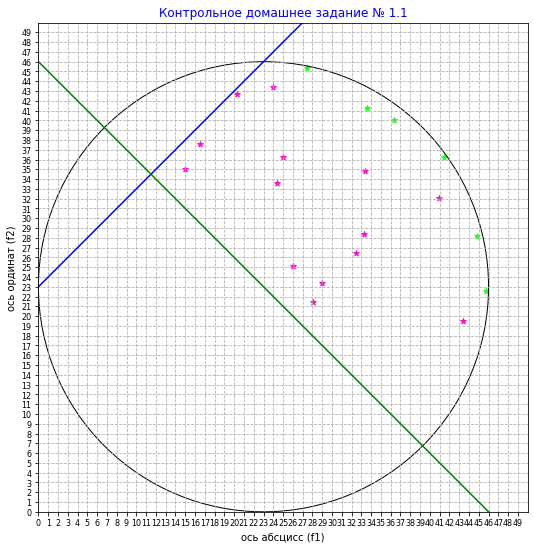

<Figure size 360x144 with 0 Axes>

,f1,f2,bi,bi точки,Фi,Ki
0,28.085750,21.461692,10,"[1, 4, 5, 7, 8, 9, 11, 13, 14, 19]",0.655172,0.60
1,44.803448,28.208759,0,[],1.000000,1.00
2,14.968645,35.031854,8,"[3, 5, 6, 14, 16, 17, 18, 19]",0.703704,0.75
3,20.245143,42.662992,2,"[6, 18]",0.904762,0.85
4,33.370057,34.783720,3,"[5, 14, 19]",0.863636,0.85
5,41.448326,36.308250,0,[],1.000000,1.00
6,24.013046,43.373380,1,[18],0.950000,0.85
7,28.972520,23.384052,8,"[1, 4, 5, 8, 9, 11, 14, 19]",0.703704,0.75
8,32.407681,26.428710,7,"[1, 4, 5, 9, 11, 14, 19]",0.730769,0.75
9,33.254365,28.423849,5,"[4, 5, 11, 14, 19]",0.791667,0.75


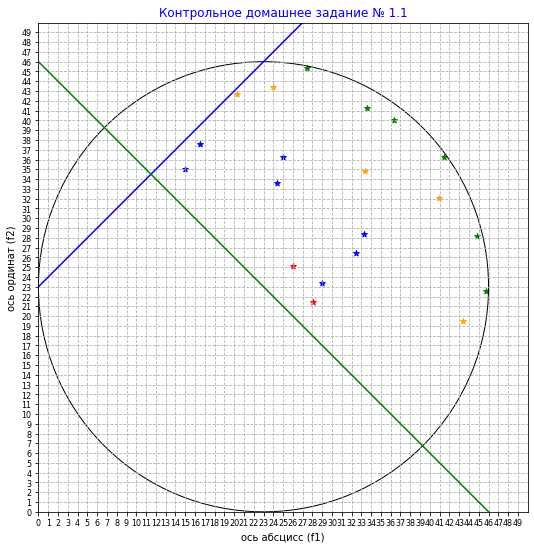

<Figure size 360x144 with 0 Axes>

In [83]:
F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
draw_vse(F1, F2)
PARE1, PARE2, NOT_PARE1, NOT_PARE2 = find_pareto(F1, F2, KOLVO)
draw_pareto(PARE1, PARE2, NOT_PARE1, NOT_PARE2)
draw_cluster(F1, F2, KOLVO)